In [1]:
#!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org hypernetx
#!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org -q pydot
#!brew install graphviz
#!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org pygraphviz

In [188]:
import numpy as np
import csv
from datetime import datetime
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import hypernetx as hnx
import io
import pandas as pd
from tqdm.auto import tqdm #progress bars for loops
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import networkx as nx
import hypernetx as hnx
import numpy as np

np.random.seed(42)
TextSize = 25

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [321]:

#this is currently how I am adding attributes to a hypergraph, but 
#I will need to change this depending on how it is defined later by HNX.
#specifically, I am making a dictionary of edges with attributes as another dictionary within the dictionary. meta.

THG = {0: [('U1', 'U4'),               {'name': 'T1', 
                                                'authors': ['U1', 'U4'], 
                                                'times': [[1.0, 2.1],[3.0, 7.2, 8.0]]}],
       
         1: [('U3', 'U3'),             {'name': 'T2', 
                                                'authors': ['U3', 'U3'], 
                                                'times': [[0.0]]}],
       
         2: [('U1', 'U1'),             {'name': 'T3', 
                                                'authors': ['U1', 'U1'], 
                                                'times': [[1.0, 2.6, 3.0]]}],
       
         3: [('U4', 'U1', 'U2'),       {'name': 'T4', 
                                                 'authors': ['U4', 'U1', 'U2'], 
                                                 'times': [[2.0],[2.5],[3.0]]}],
                                              
         4: [('U2', 'U4', 'U3'),       {'name': 'T5', 
                                                'authors': ['U2', 'U4', 'U3'], 
                                                'times': [[5.0],[5.3, 6.5], [6.8,7.0]]}],
       
         5: [('U2', 'U1'),             {'name': 'T6', 
                                                'authors': ['U2', 'U1'], 
                                                'times': [[5.7],[6.3]]}]
         }


In [322]:

#get the edges ignoring the attributes.
num_of_edges = len(THG)
HG_edges = {i: THG[i][0] for i in range(len(THG))}
attributes = {i: THG[i][1] for i in range(len(THG))}
edge_names = {i: THG[i][1]['name'] for i in range(len(THG))}
def extrema_values(inputlist):
    ma = max([max(sublist) for sublist in inputlist])
    mi = min([min(sublist) for sublist in inputlist])
    return (mi, ma)
intervals = [extrema_values(THG[i][1]['times']) for i in range(len(THG))]
 
post_times = [THG[i][1]['times'] for i in range(len(THG))]
authors = [THG[i][1]['authors'] for i in range(len(THG))]
print(edge_names)

#define positions for plotting hypergraph.

pos = {'U1': (0.0, 0.5),
       'U2': (0.5, 1.0),
       'U3': (1.0, 0.5),
       'U4': (0.5, 0.0)}

H = hnx.Hypergraph(HG_edges)
print(HG_edges)

{0: 'T1', 1: 'T2', 2: 'T3', 3: 'T4', 4: 'T5', 5: 'T6'}
{0: ('U1', 'U4'), 1: ('U3', 'U3'), 2: ('U1', 'U1'), 3: ('U4', 'U1', 'U2'), 4: ('U2', 'U4', 'U3'), 5: ('U2', 'U1')}


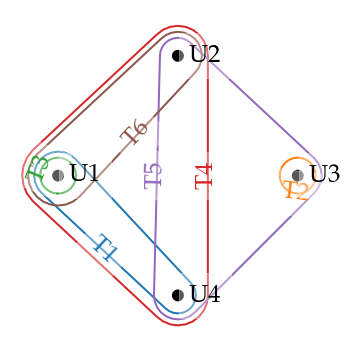

In [323]:
# Draw the hypergraph! For more on using all of the parameters
# of the draw function see the Visualization tutorial

plt.figure(figsize = (5,5))

hnx.draw(H, pos, edge_labels = edge_names, 
         edge_labels_kwargs = {'fontsize': TextSize},
         node_labels_kwargs = {'fontsize': TextSize},
         node_radius = 2, 
         edges_kwargs = {'linewidths': 2})
plt.tight_layout()
plt.savefig('example_temporal_HG.png', dpi = 600)
plt.show()

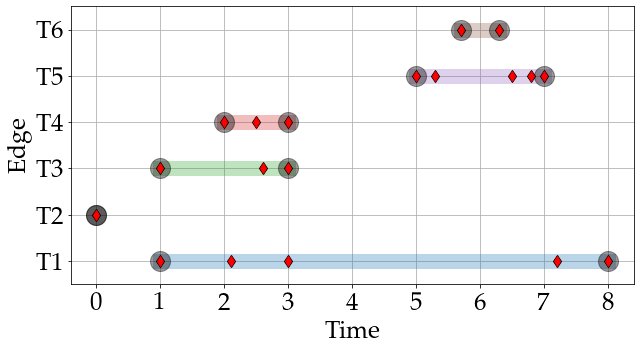

In [324]:

plt.figure(figsize=(9,5))
ts_range = np.amax(intervals) - np.amin(intervals)
import random
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']*10

infinity_ratio = 1.2
for i, interval in enumerate(intervals):
    edge_num = i
    AL = 0.3
    SI = 15
    plt.plot([interval[0], interval[1]], [edge_num, edge_num], 
                         color = colors[i], linewidth = SI, alpha = AL)
    plt.plot([interval[0], interval[1]], [edge_num, edge_num], 
             'ko', ms = SI+5, alpha = AL+0.1)

    for times_in_set in post_times[i]:
        for time in times_in_set:
            small_SI = 9
            plt.plot([time], [edge_num], 'kd', ms = small_SI)
            plt.plot([time], [edge_num], 'rd', ms = small_SI-2)
            
plt.grid()
plt.xlabel('Time', fontsize = TextSize)
plt.ylabel('Edge', fontsize = TextSize)
plt.xticks(fontsize = TextSize, rotation=0)
y_labels = [edge_names[i] for i in range(len(edge_names))]
plt.yticks(np.arange(len(edge_names)), y_labels, fontsize = TextSize)
plt.ylim(-0.5, num_of_edges-0.5)

plt.subplots_adjust(wspace= 0.5)
#plt.subplots_adjust(hspace= 0.3)
plt.tight_layout()
plt.savefig('example_intervals_for_threads.png', dpi = 600)
plt.show()

In [325]:
def weak_interval_order(interval1, interval2):
    #check weak order to determine if the direction is 1, -1, or 0
    if interval1[0] == interval2[0] and interval1[1] == interval2[1]:
        return 2
    else:
        if interval1[0] <= interval2[0] and interval1[1] <= interval2[1]: #weak order condition
            return 1
        else:
            if interval1[0] >= interval2[0] and interval1[1] >= interval2[1]: #weak order condition
                return -1
            else:
                return 0
                
#weak_interval_order function testing
print(weak_interval_order([0.5,1.5], [0,1])) #left interval is after right
print(weak_interval_order([-0.5,0.5], [0,1])) #left interval is before right
print(weak_interval_order([0.2,0.8], [0,1])) #left interval is a contained within the right
print(weak_interval_order([0,1], [0,1])) #the left and right are the same
print(weak_interval_order([0.5,1], [0,1])) #the left interval ends at the same point as the right
print(weak_interval_order([0,0.5], [0,1])) #the left interval starts at the same time as the right

-1
1
0
2
-1
1


In [521]:
#Get positions for full graph (s=1)
s = 1

M_aux_s = H.edge_adjacency_matrix(s=s)
M = M_aux_s.toarray()
G_0 = nx.from_numpy_matrix(M) 



attrs_node = attributes #attributes include interval, thread, and nodes (from HG)
nx.set_node_attributes(G_0, attrs_node)

G = G_0.to_directed()
#remove edges when there is an order between node intervals (weak order)
times = nx.get_node_attributes(G, "times")
intervals = [extrema_values(times[i]) for i in range(len(times))]
edges_to_remove = []
for edge in G.edges():
    direction = weak_interval_order(intervals[edge[0]], intervals[edge[1]])
    #only if the direction of the weak order does math the edge direction is the edge removed
    if direction == -1: #if direction is to the left
        edges_to_remove.append((edge[0], edge[1]))
    # if direction == 1: do nothing since edge is already there
    # if direction == 2: leave both directions since both intervals are the same
    if direction == 0: #remove both edges
        edges_to_remove.append((edge[0], edge[1]))
        edges_to_remove.append((edge[1], edge[0]))
G.remove_edges_from(edges_to_remove)

from networkx.drawing.nx_agraph import graphviz_layout
np.random.seed(42)
pos = nx.spring_layout(G_0, iterations = 2000, k = 1)
pos_DAG = graphviz_layout(G, prog='dot', root = 2) #bottleneck... very slow (6 mins)




In [522]:
p_t1_0 = list(pos_DAG[0])
p_t2_0 = list(pos_DAG[1])
p_t3_0 = list(pos_DAG[2])
p_t2 = p_t1_0
p_t1 = tuple([p_t2_0[0]+5, p_t2_0[1]+15])
p_t3 = tuple([p_t3_0[0]+20, p_t3_0[1]-10])

pos_DAG[0] = tuple(p_t1)
pos_DAG[1] = tuple(p_t2)
pos_DAG[2] = tuple(p_t3)

Number of isolated nodes:  0


<ipython-input-523-dac34ef02f6e>:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


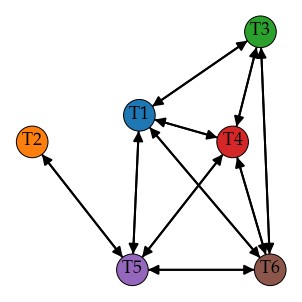

In [523]:


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']*10
labeldict = {key: THG[key][1]['name'] for key in THG}
colors_IG = colors[:len(G_0.nodes())]

draw_isolated_nodes = False
G_modified = G_0.copy()
if draw_isolated_nodes == False:
    isolated_nodes = list(nx.isolates(G_modified))
    print('Number of isolated nodes: ', len(isolated_nodes))
    G_modified.remove_nodes_from(isolated_nodes)

I = np.array(list(G_modified.nodes())).astype(int)
colors_to_use = []
for i in I: colors_to_use.append(colors_IG[i])
colors_IG = colors_to_use

plt.figure(figsize = (4,4))
nx.draw(G_modified.to_directed(), pos = pos_DAG, with_labels = True, node_size = 1000, 
        node_color = colors_IG, width = 2, labels=labeldict, arrowsize=20,
        font_size = TextSize-7)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("black")
plt.tight_layout()
plt.savefig('example_Ls_graph_s'+str(s)+'.png', dpi = 600)
plt.show()

In [524]:
#Get positions for full graph (s=1)
nx.set_node_attributes(G_0, attrs_node)
G_0x = nx.complete_graph(6)
Gx = G_0x.to_directed()
#remove edges when there is an order between node intervals (weak order)
times = nx.get_node_attributes(G, "times")
intervals = [extrema_values(times[i]) for i in range(len(times))]
edges_to_remove = []
for edge in Gx.edges():
    direction = weak_interval_order(intervals[edge[0]], intervals[edge[1]])
    #only if the direction of the weak order does math the edge direction is the edge removed
    if direction == -1: #if direction is to the left
        edges_to_remove.append((edge[0], edge[1]))
    # if direction == 1: do nothing since edge is already there
    # if direction == 2: leave both directions since both intervals are the same
    if direction == 0: #remove both edges
        edges_to_remove.append((edge[0], edge[1]))
        edges_to_remove.append((edge[1], edge[0]))
Gx.remove_edges_from(edges_to_remove)

Component sizes (number of nodes per component) (excluding isolated nodes):  [6]
Number of connected components (exluding isolated nodes):  1
Number of edges:  6
Number of isolated nodes:  0
{0: 'T1', 1: 'T2', 2: 'T3', 3: 'T4', 4: 'T5', 5: 'T6'}


<ipython-input-525-2bebf8865512>:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


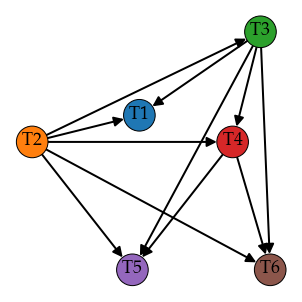

In [525]:
component_sizes = [len(c) for c in nx.weakly_connected_components(G)] #weakly_connected_components for directed graphs
print('Component sizes (number of nodes per component) (excluding isolated nodes): ', component_sizes)
number_of_components = len(component_sizes)
print('Number of connected components (exluding isolated nodes): ', number_of_components)
number_of_edges = G.number_of_edges()
print('Number of edges: ', number_of_edges)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']*10


draw_isolated_nodes = False
G_modified = Gx.copy()
if draw_isolated_nodes == False:
    isolated_nodes = list(nx.isolates(G_modified))
    print('Number of isolated nodes: ', len(isolated_nodes))
    G_modified.remove_nodes_from(isolated_nodes)

colors_IG = colors[:len(Gx.nodes())]
I = np.array(list(G_modified.nodes())).astype(int)
colors_to_use = []
for i in I: colors_to_use.append(colors_IG[i])
colors_IG = colors_to_use

labeldict = {key: THG[key][1]['name'] for key in THG if key in G_modified.nodes()}
print(labeldict)

if number_of_components > 0:
    plt.figure(figsize = (4,4))
    nx.draw(G_modified, pos = pos_DAG, with_labels = True, node_size = 1000, 
            node_color = colors_IG, width = 2, labels=labeldict, arrowsize=20,
            font_size = TextSize-7)
    ax = plt.gca() # to get the current axis
    ax.collections[0].set_edgecolor("black")
    plt.tight_layout()
    plt.savefig('example_edge_temporal_Lf_graph.png', dpi = 600)
    plt.show()

Component sizes (number of nodes per component) (excluding isolated nodes):  [6]
Number of connected components (exluding isolated nodes):  1
Number of edges:  6
Number of isolated nodes:  0
{0: 'T1', 1: 'T2', 2: 'T3', 3: 'T4', 4: 'T5', 5: 'T6'}


<ipython-input-526-5d5ff9b5bb4c>:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


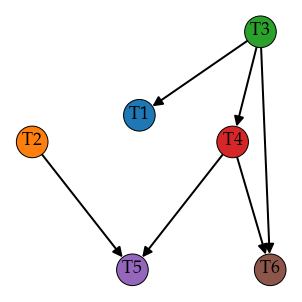

In [526]:
component_sizes = [len(c) for c in nx.weakly_connected_components(G)] #weakly_connected_components for directed graphs
print('Component sizes (number of nodes per component) (excluding isolated nodes): ', component_sizes)
number_of_components = len(component_sizes)
print('Number of connected components (exluding isolated nodes): ', number_of_components)
number_of_edges = G.number_of_edges()
print('Number of edges: ', number_of_edges)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']*10


draw_isolated_nodes = False
G_modified = G.copy()
if draw_isolated_nodes == False:
    isolated_nodes = list(nx.isolates(G_modified))
    print('Number of isolated nodes: ', len(isolated_nodes))
    G_modified.remove_nodes_from(isolated_nodes)

colors_IG = colors[:len(G.nodes())]
I = np.array(list(G_modified.nodes())).astype(int)
colors_to_use = []
for i in I: colors_to_use.append(colors_IG[i])
colors_IG = colors_to_use

labeldict = {key: THG[key][1]['name'] for key in THG if key in G_modified.nodes()}
print(labeldict)

if number_of_components > 0:
    plt.figure(figsize = (4,4))
    nx.draw(G_modified, pos = pos_DAG, with_labels = True, node_size = 1000, 
            node_color = colors_IG, width = 2, labels=labeldict, arrowsize=20,
            font_size = TextSize-7)
    ax = plt.gca() # to get the current axis
    ax.collections[0].set_edgecolor("black")
    plt.tight_layout()
    plt.savefig('example_edge_temporal_Lfs_graph_s'+str(s)+'.png', dpi = 600)
    plt.show()

In [527]:
def temporal_s_edge_adjaceny_matrix(attributes, s):
    '''
    This function returns an adjacency matrix where A_ij is number of authors 
    that posted in thread i and then in thread j given there is an intersection between edges i and j greater or equal to s.

    Parameters:
      attributes (dictionary of dictionaries): are described above and are auxillary information from hypergraph edges. length of attributes is the number of edges.
      s (int): is a chosen parameter.
    '''
    number_of_edges = len(attributes.keys()) #gets the number of edges from length of attributes
    A = np.zeros((number_of_edges, number_of_edges)) #initialize adjacency matrix
    for i in range(number_of_edges): #go through each edge i
        for j in range(number_of_edges): #go through each edge j
            edge_attributes_i = attributes[i] #get edge attributes for edge i
            edge_attributes_j = attributes[j] #get edge attributes for edge j
            if i != j: # we dont fill in diagonal since it doesnt make sense
                edge_i_j_intersection = set(edge_attributes_i['authors']).intersection(set(edge_attributes_j['authors'])) #get the node set of the intersection
                if len(edge_i_j_intersection) >= s: # check intersection size
                    for author in edge_i_j_intersection: #go through each node (author) in intersection
                        point_i = (edge_attributes_i['times'])[edge_attributes_i['authors'] == author][0] #get author's interval in edge_i
                        point_j = (edge_attributes_j['times'])[edge_attributes_j['authors'] == author][0] #get author's interval in edge_j
                        if point_i <= point_j: #if direction is to the right
                            A[i][j] += 1 #increment A at i, j
    return A


In [528]:
attributes

{0: {'name': 'T1',
  'authors': ['U1', 'U4'],
  'times': [[1.0, 2.1], [3.0, 7.2, 8.0]]},
 1: {'name': 'T2', 'authors': ['U3', 'U3'], 'times': [[0.0]]},
 2: {'name': 'T3', 'authors': ['U1', 'U1'], 'times': [[1.0, 2.6, 3.0]]},
 3: {'name': 'T4',
  'authors': ['U4', 'U1', 'U2'],
  'times': [[2.0], [2.5], [3.0]]},
 4: {'name': 'T5',
  'authors': ['U2', 'U4', 'U3'],
  'times': [[5.0], [5.3, 6.5], [6.8, 7.0]]},
 5: {'name': 'T6', 'authors': ['U2', 'U1'], 'times': [[5.7], [6.3]]}}

In [529]:

A_s = temporal_s_edge_adjaceny_matrix(attributes, s) #this is directed, but read function description.

#truncated version of A_s that is a boolean matrix with 1 if A_s[i,j] >= s
Tr_A_s = np.copy(A_s)
Tr_A_s[A_s<s] = 0
Tr_A_s[A_s>=s] = 1 


Number of isolated nodes:  0
Component sizes (number of nodes per component) (excluding isolated nodes):  [6]
Number of connected components (excluding isolated nodes):  1
Number of edges:  11
{0: 'T1', 1: 'T2', 2: 'T3', 3: 'T4', 4: 'T5', 5: 'T6'}


<ipython-input-530-9706d17b11b7>:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


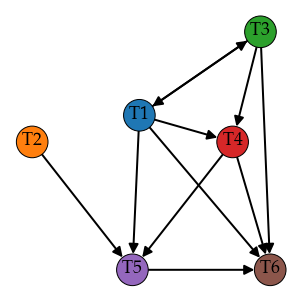

In [530]:
G =nx.from_numpy_matrix(Tr_A_s, create_using=nx.MultiDiGraph())
draw_isolated_nodes = False
np.random.seed(1)
G_modified = G.copy()
if draw_isolated_nodes == False:
    isolated_nodes = list(nx.isolates(G_modified))
    print('Number of isolated nodes: ', len(isolated_nodes))
    G_modified.remove_nodes_from(isolated_nodes)

component_sizes = [len(c) for c in nx.weakly_connected_components(G_modified)] #weakly_connected_components for directed graphs
print('Component sizes (number of nodes per component) (excluding isolated nodes): ', component_sizes)
number_of_components = len(component_sizes)
print('Number of connected components (excluding isolated nodes): ', number_of_components)
number_of_edges = G_modified.number_of_edges()
print('Number of edges: ', number_of_edges)

colors_IG = colors[:len(G.nodes())]
I = np.array(list(G_modified.nodes())).astype(int)
colors_to_use = []
for i in I: colors_to_use.append(colors_IG[i])
colors_IG = colors_to_use

labeldict = {key: THG[key][1]['name'] for key in THG if key in G_modified.nodes()}
print(labeldict)

if number_of_components > 0:

    plt.figure(figsize = (4,4))
    nx.draw(G_modified, pos = pos_DAG, with_labels = True, node_size = 1000, 
            node_color = colors_IG, width = 2, labels=labeldict, arrowsize = 20,
            font_size = TextSize-7)
    ax = plt.gca() # to get the current axis
    ax.collections[0].set_edgecolor("black")
    plt.tight_layout()
    plt.savefig('example_incidence_temporal_Lfs_graph_s'+str(s)+'.png', dpi = 600)
    plt.show()